Методичка

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=10000, n_features=500, n_informative=50, n_repeated=0, class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8415
Test score: 0.8056


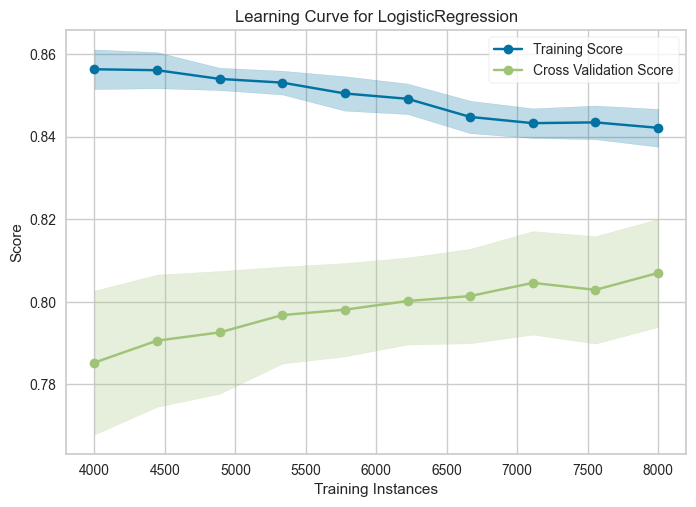

In [8]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [9]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


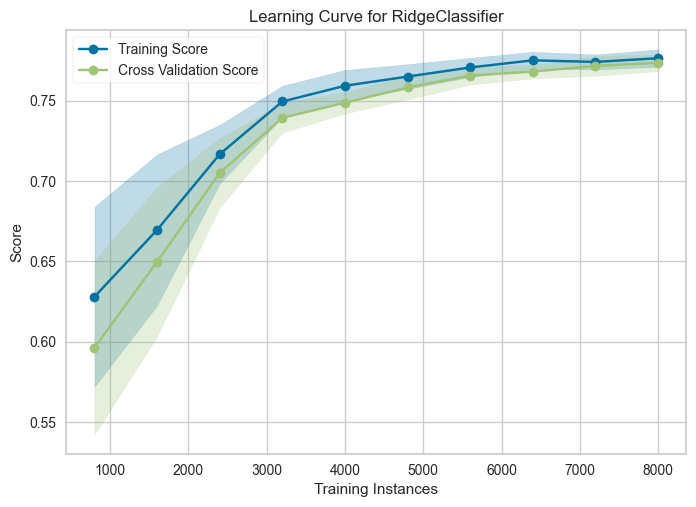

In [11]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

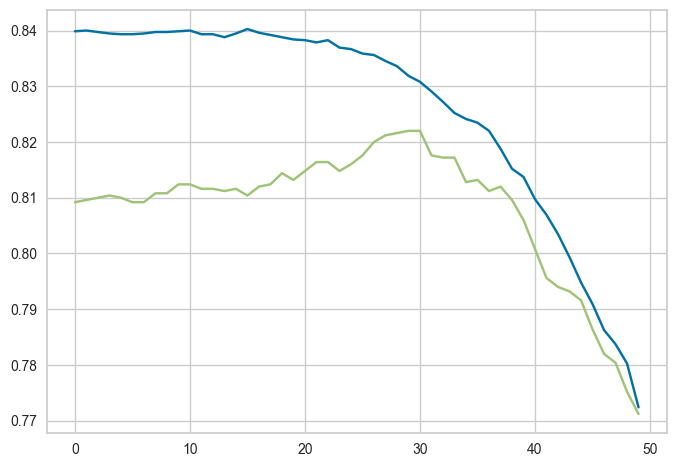

In [12]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [13]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


In [14]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/m-mehdi/tutorials/main/boston_housing.csv', delimiter=',')
X = dataset[:,:-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

Решение задач

№1 Загрузите первые 400 строк прилагающегося датасета diabetes.csv.

In [17]:
import pandas as pd

file_path = 'diabetes.csv'
data = pd.read_csv(file_path, nrows=400)

№2 Сделайте количественное описание датасета: число признаков, статистику по признакам

In [18]:
feature_count = data.shape[1]
feature_info = data.describe()

feature_count, feature_info

(9,
        Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
 count   400.000000  400.00000     400.000000     400.000000  400.000000   
 mean      3.952500  121.24000      69.060000      20.327500   81.250000   
 std       3.369514   32.68437      19.011575      15.599796  121.597254   
 min       0.000000    0.00000       0.000000       0.000000    0.000000   
 25%       1.000000  100.00000      64.000000       0.000000    0.000000   
 50%       3.000000  116.50000      71.000000      23.000000   36.000000   
 75%       6.000000  143.00000      80.000000      32.000000  128.250000   
 max      17.000000  197.00000     122.000000      60.000000  846.000000   
 
              BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  400.00000                400.000000  400.000000  400.000000  
 mean    32.10775                  0.487915   33.092500    0.380000  
 std      8.13714                  0.349619   11.325396    0.485994  
 min      0.00000             

№3 Отделите целевую переменную Outcome.

In [19]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X.head(), y.head()


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6      148             72             35        0  33.6   
 1            1       85             66             29        0  26.6   
 2            8      183             64              0        0  23.3   
 3            1       89             66             23       94  28.1   
 4            0      137             40             35      168  43.1   
 
    DiabetesPedigreeFunction  Age  
 0                     0.627   50  
 1                     0.351   31  
 2                     0.672   32  
 3                     0.167   21  
 4                     2.288   33  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: Outcome, dtype: int64)

№4 Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 8), (80, 8), (320,), (80,))

№5 Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

dt_classifier = DecisionTreeClassifier(random_state=1)

dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

f1_score_train = f1_score(y_train, y_train_pred)
f1_score_test = f1_score(y_test, y_test_pred)

f1_score_train, f1_score_test

(1.0, 0.6363636363636364)

№6 Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.

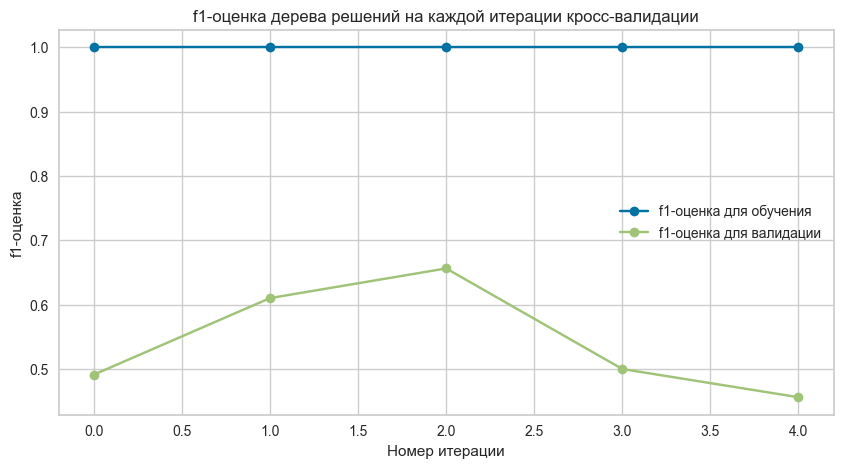

In [23]:
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

cv_results = cross_validate(dt_classifier, X, y, cv=5, scoring='f1', return_train_score=True)

train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

plt.figure(figsize=(10, 5))
plt.plot(train_scores, label='f1-оценка для обучения', marker='o')
plt.plot(test_scores, label='f1-оценка для валидации', marker='o')
plt.title('f1-оценка дерева решений на каждой итерации кросс-валидации')
plt.xlabel('Номер итерации')
plt.ylabel('f1-оценка')
plt.legend()
plt.grid(True)
plt.show()

№7 Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.

In [24]:
dt_classifier_regularized = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_classifier_regularized.fit(X_train, y_train)

y_train_pred_regularized = dt_classifier_regularized.predict(X_train)
y_test_pred_regularized = dt_classifier_regularized.predict(X_test)

f1_score_train_regularized = f1_score(y_train, y_train_pred_regularized)
f1_score_test_regularized = f1_score(y_test, y_test_pred_regularized)

f1_score_train_regularized, f1_score_test_regularized

(0.5058823529411766, 0.47826086956521735)

№8 Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.

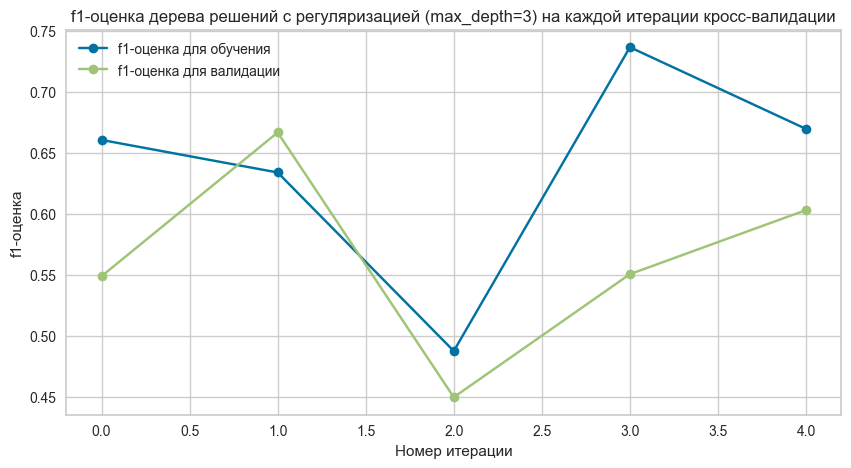

In [25]:
cv_results_regularized = cross_validate(dt_classifier_regularized, X, y, cv=5, scoring='f1', return_train_score=True)

train_scores_regularized = cv_results_regularized['train_score']
test_scores_regularized = cv_results_regularized['test_score']

plt.figure(figsize=(10, 5))
plt.plot(train_scores_regularized, label='f1-оценка для обучения', marker='o')
plt.plot(test_scores_regularized, label='f1-оценка для валидации', marker='o')
plt.title('f1-оценка дерева решений с регуляризацией (max_depth=3) на каждой итерации кросс-валидации')
plt.xlabel('Номер итерации')
plt.ylabel('f1-оценка')
plt.legend()
plt.grid(True)
plt.show()

№9 Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.

In [26]:
full_data = pd.read_csv(file_path)

full_data.shape


(768, 9)

№10 Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [27]:
X_full = full_data.drop('Outcome', axis=1)
y_full = full_data['Outcome']

dt_classifier_full = DecisionTreeClassifier(random_state=1, max_depth=3)
dt_classifier_full.fit(X_full, y_full)

cv_results_full = cross_validate(dt_classifier_full, X_full, y_full, cv=5, scoring='f1', return_train_score=True)

mean_train_f1_full = cv_results_full['train_score'].mean()
mean_test_f1_full = cv_results_full['test_score'].mean()

mean_train_f1_full, mean_test_f1_full

(0.6051207731077893, 0.5249245395127747)

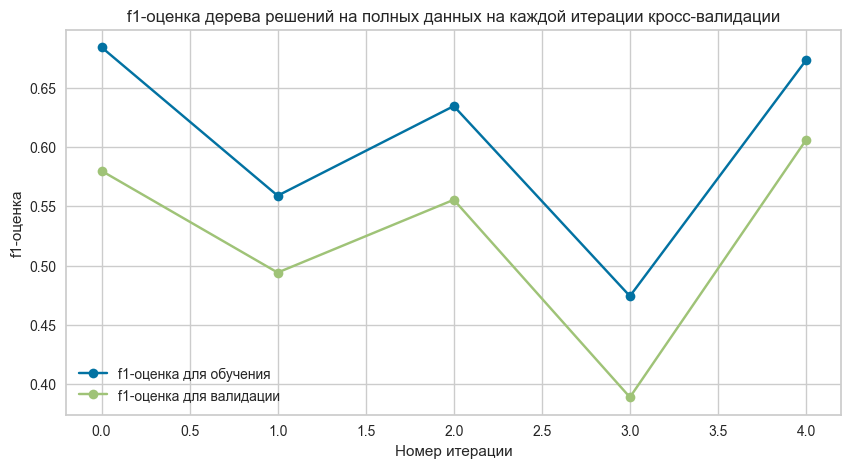

In [28]:
train_scores_full = cv_results_full['train_score']
test_scores_full = cv_results_full['test_score']

plt.figure(figsize=(10, 5))
plt.plot(train_scores_full, label='f1-оценка для обучения', marker='o')
plt.plot(test_scores_full, label='f1-оценка для валидации', marker='o')
plt.title('f1-оценка дерева решений на полных данных на каждой итерации кросс-валидации')
plt.xlabel('Номер итерации')
plt.ylabel('f1-оценка')
plt.legend()
plt.grid(True)
plt.show()